In [6]:
import godot.core.tempo as tempo
import godot.core.events as events

# optionally avoid verbose logging messages
import godot.core.util as util
util.suppressLogger()

In [7]:
import godot.cosmos as cosmos
import ruamel.yaml as yaml

uniConfig = cosmos.util.load_yaml('universe2.yml')
uni = cosmos.Universe(uniConfig)

In [8]:
for p in uni.frames.listPointNames():
    print(f"Frames contains point {p}") 

Frames contains point solarSystem_point
Frames contains point solarSystemGravity_point
Frames contains point GeoSat
Frames contains point PR11
Frames contains point Perth
Frames contains point DSS26
Frames contains point Goldstone_26
Frames contains point New_Norcia_Two
Frames contains point MS12
Frames contains point MS11
Frames contains point DSS55
Frames contains point KO12
Frames contains point BEAR_LAKES
Frames contains point NN13
Frames contains point NN12
Frames contains point DSS24
Frames contains point DSS45
Frames contains point VL42
Frames contains point VL41
Frames contains point NN21
Frames contains point DSS42
Frames contains point Canberra_42
Frames contains point Canberra_34
Frames contains point NN22
Frames contains point DSS35
Frames contains point Kourou
Frames contains point MLX4
Frames contains point Canberra_35
Frames contains point USUDA
Frames contains point Vilspa_1
Frames contains point NN11
Frames contains point VL21
Frames contains point solarSystemGravity_c

In [19]:
import godot.core.astro as astro 


#Fungerer ikke helt med mine goals
import numpy as np
def sphere_intersection(camera_pos, direction, radius = 1737.4):
    """Calculate the intersection of a vector from the camera position with a sphere."""
    direction = direction / np.linalg.norm(direction)  # Normalize direction
    b = 2 * np.dot(camera_pos, direction)
    c = np.dot(camera_pos, camera_pos) - radius**2
    discriminant = b**2 - 4 * c
    
    if discriminant < 0:
        #print('No intersect with surface!')
        return -1  # No intersection
    t_1 = (-b - np.sqrt(discriminant))/2
    t_2 = (-b + np.sqrt(discriminant))/2

    t = t_1 if abs(t_1) < np.abs(t_2) else t_2     
    intersection = camera_pos + t * direction

    #print("INTERSECTED!")
    return np.sqrt(np.sum(np.power(camera_pos - intersection,2)))

def NNSCblockedByMoon( epo ):
    NN = uni.frames.vector3('Moon', 'New_Norcia', 'ICRF', epo)
    SC = uni.frames.vector3('Moon', 'SC', 'ICRF', epo)
    # print(NN)
    # print(np.sqrt(np.sum(NN**2)))
    # print(np.sqrt(np.sum(g**2)))
    # print(np.sqrt(np.sum(SC**2)))
    #print(sphere_intersection(NN2M,NN2SC))
    res = sphere_intersection(NN,NN-SC)
    closer = (np.sqrt(np.sum(np.power(NN-SC,2))) < res)
    print(f"Intersect?: {res} - closer: {closer} \n\tNN: {NN}\n\tSC: {SC}")
    if (res == -1) or closer:
        return 1
    else:
        return -1

In [13]:
import godot.core.tempo as tempo
ep1 = tempo.Epoch('2026-04-01T00:00:00 TDB')
ep2 = tempo.Epoch('2026-04-02T00:00:00 TDB')
rng    = tempo.EpochRange( ep1, ep2 )

In [20]:
xtol = 1e-6
step = 10.0
grid = rng.createGrid(30.0) # 30 seconds stepsize
eps = 1e-6

end = ep1.value()
NNSCBlocked = events.generateEventIntervalSet(NNSCblockedByMoon, eps, grid, xtol)
for interval in NNSCBlocked:
    start = interval.start().value()
    print(f"Away for {start - end} secs")
    #print(interval.start().value().calStr('TT',0)[8:10])
    end = interval.end().value()
    print( f"\tView from {start} to {end}, duration {end - start} secs" )

Intersect?: 391430.29081928724 - closer: True 
	NN: [392591.73862391 -21069.30810551   2554.57910903]
	SC: [1787.4    0.     0. ]
Intersect?: 391440.851497235 - closer: True 
	NN: [392603.64945847 -21035.77207983   2568.97740493]
	SC: [1.78670947e+03 3.04198727e-15 4.96794223e+01]
Intersect?: 391430.29081928724 - closer: True 
	NN: [392591.73862391 -21069.30810551   2554.57910903]
	SC: [1787.4    0.     0. ]
Intersect?: 391430.29081961885 - closer: True 
	NN: [392591.73862432 -21069.30810438   2554.57910951]
	SC: [1.78740000e+03 1.01412638e-22 1.65619406e-06]
Intersect?: 391440.85149685125 - closer: True 
	NN: [392603.64945805 -21035.77208096   2568.97740445]
	SC: [1.78670947e+03 3.04198717e-15 4.96794206e+01]
Intersect?: 391440.85149766237 - closer: True 
	NN: [392603.64945888 -21035.7720787    2568.97740541]
	SC: [1.78670947e+03 3.04198738e-15 4.96794239e+01]
Intersect?: 391440.851497235 - closer: True 
	NN: [392603.64945847 -21035.77207983   2568.97740493]
	SC: [1.78670947e+03 3.041

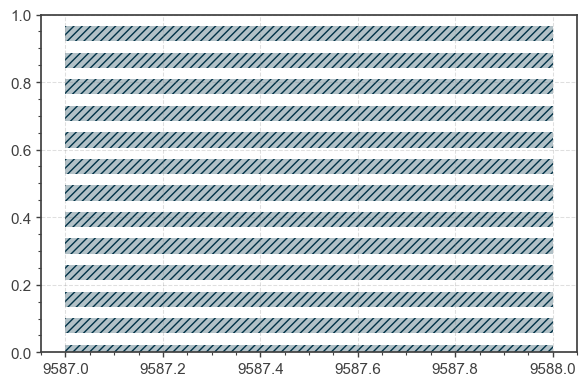

In [21]:
from godot.cosmos.show import Axes, Dimension

# Create axes of projection Time, Time

ax = Axes(projection=(Dimension.TIME, Dimension.TIME))

# Plot EventIntervalSets

ax.plot(NNSCBlocked, hatch="////", add_borders=True, ls=":")